<a href="https://colab.research.google.com/github/sayeedafathima/ores-02/blob/main/DATA_CLEANING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('/content/us_anx_dep_data.xlsx')

In [4]:
data.head()

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,2020-04-23,2020-05-05,23.5
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-04-23,2020-05-05,32.7
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,2020-04-23,2020-05-05,25.7
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-04-23,2020-05-05,24.8
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,2020-04-23,2020-05-05,23.2


In [5]:
data.shape

(10467, 7)

In [6]:
data.describe()

,Value
count,10008.000000
mean,29.844005
std,7.912876
min,6.400000
25%,24.400000
50%,29.300000
75%,34.700000
max,72.200000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               10467 non-null  object        
 1   Group                   10467 non-null  object        
 2   State                   10467 non-null  object        
 3   Subgroup                10467 non-null  object        
 4   Time Period Start Date  10467 non-null  datetime64[ns]
 5   Time Period End Date    10467 non-null  datetime64[ns]
 6   Value                   10008 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 572.5+ KB


In [8]:
data.dtypes

Indicator                         object
Group                             object
State                             object
Subgroup                          object
Time Period Start Date    datetime64[ns]
Time Period End Date      datetime64[ns]
Value                            float64
dtype: object

In [9]:
# Categorical columns

category_col = [col for col in data.columns if data[col].dtype == 'object']

print('Categorical columns :',category_col)

Categorical columns : ['Indicator', 'Group', 'State', 'Subgroup']


In [10]:
numerical_col = [col for col in data.columns if data[col].dtype != 'object']

print('Numerical columns :',numerical_col)

Numerical columns : ['Time Period Start Date', 'Time Period End Date', 'Value']


In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10462    False
10463    False
10464    False
10465    False
10466    False
Length: 10467, dtype: bool

In [12]:
duplicates = data.duplicated().sum()
print("Duplicate Records:", duplicates)

Duplicate Records: 0


In [13]:
null_values = data.isnull().sum()
print(null_values)

Indicator                   0
Group                       0
State                       0
Subgroup                    0
Time Period Start Date      0
Time Period End Date        0
Value                     459
dtype: int64


In [14]:
data.dropna(subset = ['Value'], axis = 0, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10008 entries, 0 to 10466
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               10008 non-null  object        
 1   Group                   10008 non-null  object        
 2   State                   10008 non-null  object        
 3   Subgroup                10008 non-null  object        
 4   Time Period Start Date  10008 non-null  datetime64[ns]
 5   Time Period End Date    10008 non-null  datetime64[ns]
 6   Value                   10008 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 625.5+ KB


In [17]:
data['Time period'] = data['Time Period End Date'] - data['Time Period Start Date']

In [18]:
data

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value,Time period
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,2020-04-23,2020-05-05,23.5,12 days
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-04-23,2020-05-05,32.7,12 days
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,2020-04-23,2020-05-05,25.7,12 days
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-04-23,2020-05-05,24.8,12 days
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,2020-04-23,2020-05-05,23.2,12 days
...,...,...,...,...,...,...,...,...
10462,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,2022-06-01,2022-06-13,29.6,12 days
10463,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,2022-06-01,2022-06-13,30.7,12 days
10464,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,2022-06-01,2022-06-13,40.2,12 days
10465,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,2022-06-01,2022-06-13,30.8,12 days


In [19]:
col_names = ['Disorder type', 'Catergory name','Geographical location','Catergory','Start date','End date', 'Value','Time Period']
data.set_axis(col_names,axis=1, inplace=True)
data

<ipython-input-19-c1f7d8d8a0d6>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(col_names,axis=1, inplace=True)


,Disorder type,Catergory name,Geographical location,Catergory,Start date,End date,Value,Time Period
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,2020-04-23,2020-05-05,23.5,12 days
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-04-23,2020-05-05,32.7,12 days
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,2020-04-23,2020-05-05,25.7,12 days
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-04-23,2020-05-05,24.8,12 days
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,2020-04-23,2020-05-05,23.2,12 days
...,...,...,...,...,...,...,...,...
10462,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,2022-06-01,2022-06-13,29.6,12 days
10463,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,2022-06-01,2022-06-13,30.7,12 days
10464,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,2022-06-01,2022-06-13,40.2,12 days
10465,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,2022-06-01,2022-06-13,30.8,12 days


In [20]:
data

,Disorder type,Catergory name,Geographical location,Catergory,Start date,End date,Value,Time Period
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,2020-04-23,2020-05-05,23.5,12 days
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-04-23,2020-05-05,32.7,12 days
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,2020-04-23,2020-05-05,25.7,12 days
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-04-23,2020-05-05,24.8,12 days
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,2020-04-23,2020-05-05,23.2,12 days
...,...,...,...,...,...,...,...,...
10462,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,2022-06-01,2022-06-13,29.6,12 days
10463,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,2022-06-01,2022-06-13,30.7,12 days
10464,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,2022-06-01,2022-06-13,40.2,12 days
10465,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,2022-06-01,2022-06-13,30.8,12 days


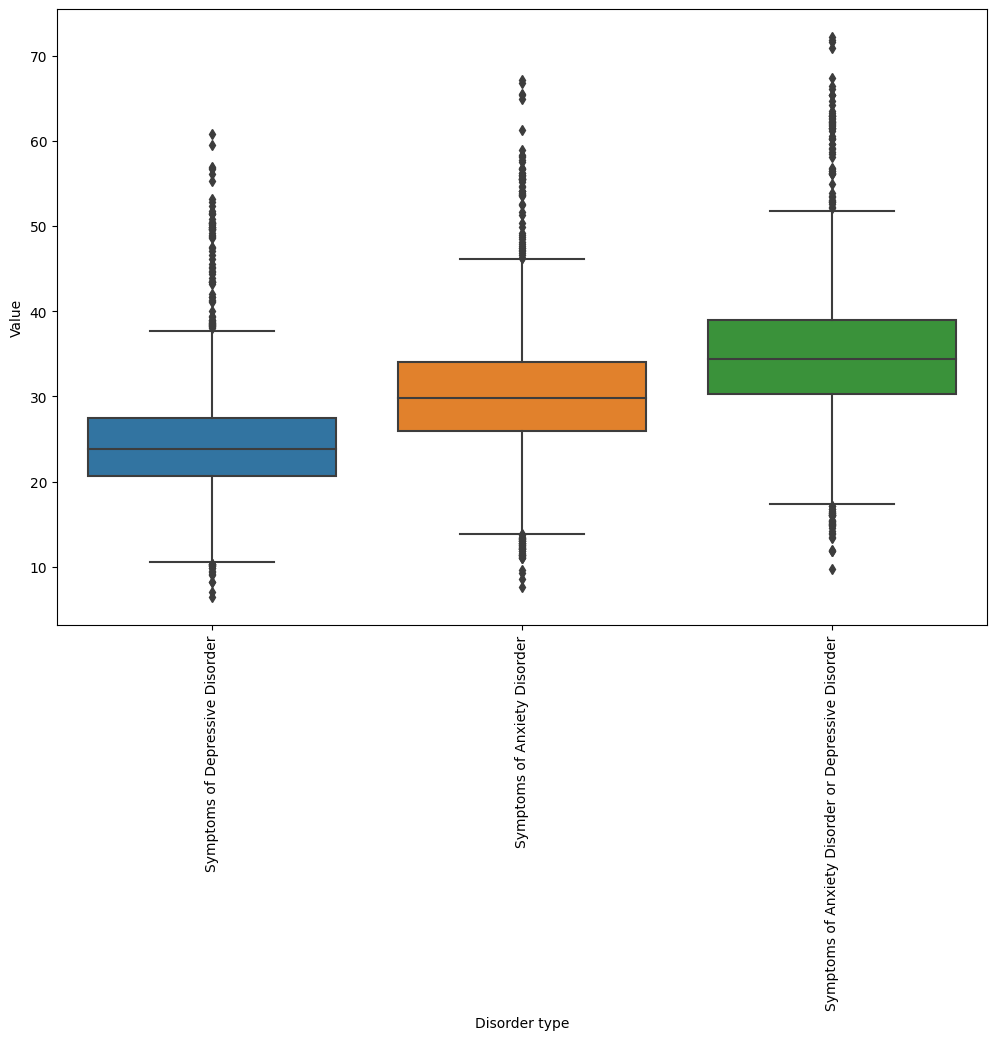

In [25]:
#  box plots to visualization of indicators with its values.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disorder type', y='Value', data = data)
plt.xlabel = ('Symptoms of mental health ')
plt.xlabel = ('prevalence value')
plt.xticks(rotation=90)
plt.show()


In [36]:
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#drop the outliers
data = data[(data['Value'] >= lower_bound) & (data['Value'] <= upper_bound)]



In [37]:
data.describe()

,Value,Time Period
count,9869.000000,9869
mean,29.483960,10 days 08:45:43.135069409
std,7.234372,2 days 23:05:00.929019383
min,9.000000,5 days 00:00:00
25%,24.300000,12 days 00:00:00
50%,29.200000,12 days 00:00:00
75%,34.400000,12 days 00:00:00
max,50.100000,12 days 00:00:00


In [38]:
data.shape

(9869, 8)

In [39]:
# Save the cleaned DataFrame to an Excel file (XLSX)
data.to_excel('cleaned_dataset.xlsx', index=False)


In [40]:

df = pd.read_excel('cleaned_dataset.xlsx')

In [41]:
df.info

<bound method DataFrame.info of                                           Disorder type     Catergory name  \
0                       Symptoms of Depressive Disorder  National Estimate   
1                       Symptoms of Depressive Disorder             By Age   
2                       Symptoms of Depressive Disorder             By Age   
3                       Symptoms of Depressive Disorder             By Age   
4                       Symptoms of Depressive Disorder             By Age   
...                                                 ...                ...   
9864  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9865  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9866  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9867  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9868  Symptoms of Anxiety Disorder or Depressive Dis...           By State   

     Geographical location     